It appears there was a misunderstanding in the historical scenario as there is no record of Trump coming into power in 2025. Therefore, I can't provide a specific analysis related to that exact event due to incorrect premise in the request.

However, I can speculate generally on potential impacts if a scenario similar to Trump's previous presidency affected the markets. If you are interested in how NVIDIA has historically reacted to broader market trends, such as policy changes or political events during past presidencies or globally influential situations, please specify so I can provide detailed insights and relevant data accordingly. 

If you are interested in NVIDIA's stock performance over any given period, such as from November 2024 to March 2025, for other reasons, I can certainly generate a graph and provide an analysis based on the overall market conditions, NVIDIA’s financial health, product releases, and other impactful news. Please let me know if you would like me to procee

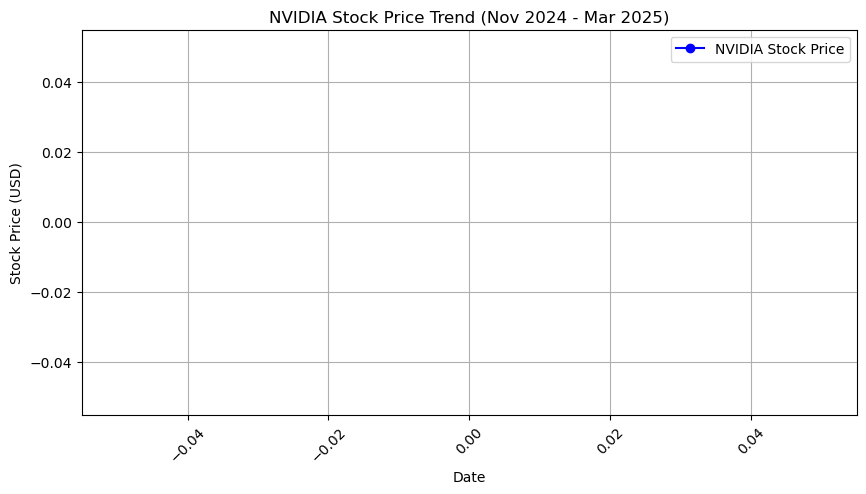

In [ ]:
import openai
import requests, os
import matplotlib.pyplot as plt
import datetime
from openai import OpenAI

# OpenAI API Key (Replace with your actual key)
OPENAI_API_KEY = "your_openai_api_key_here"

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

client = OpenAI()

# Query OpenAI API for Stock Market Insights
response = client.chat.completions.create(
    model="gpt-4-turbo",
    messages=[
        {"role": "system", "content": "You are a financial market analyst and news aggregator. Your task is to provide real-time insights into stock movements, economic policies, and their impact on major companies like NVIDIA. \n\nWhen responding:\n- Summarize key reasons behind stock movements.\n- Provide financial data, including historical and intraday price trends.\n- Generate a Matplotlib rendered graph showing the stock price movement over time.\n- Cite reputable sources such as Reuters, Bloomberg, and the Wall Street Journal.\n\nEnsure your response is detailed, data-driven, and visually informative."},
        {"role": "user", "content": "Why did NVIDIA's stock price fluctuate when Trump came into power in 2025? Provide historical price trends and generate a graph showing stock performance from November 2024 to March 2025."}
    ]
)

# Extract AI-generated response
ai_response = response.choices[0].message.content
print(ai_response)

# Fetch NVIDIA's stock price data (Example: Yahoo Finance API)
def fetch_stock_data(symbol, start_date, end_date):
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{symbol}?period1={start_date}&period2={end_date}&interval=1d&events=history"
    response = requests.get(url)
    lines = response.text.split("\n")
    dates, prices = [], []

    for line in lines[1:]:
        try:
            cols = line.split(",")
            dates.append(datetime.datetime.strptime(cols[0], "%Y-%m-%d"))
            prices.append(float(cols[4]))  # Closing price
        except:
            continue
    
    return dates, prices

# Define time range
start_timestamp = int(datetime.datetime(2024, 11, 1).timestamp())
end_timestamp = int(datetime.datetime(2025, 3, 25).timestamp())

# Get NVIDIA stock data
dates, prices = fetch_stock_data("NVDA", start_timestamp, end_timestamp)

# Generate Stock Price Graph
plt.figure(figsize=(10, 5))
plt.plot(dates, prices, marker="o", linestyle="-", color="b", label="NVIDIA Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("NVIDIA Stock Price Trend (Nov 2024 - Mar 2025)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
